# Otter Image Demo (In-context Learning)

Here is an example of multi-modal ICL (in-context learning) with 🦦 Otter. We provide two demo images with corresponding instructions and answers, then we ask the model to generate an answer given our instruct. You may change your instruction and see how the model responds.

You can also try our [online demo](https://otter.cliangyu.com/) to see more in-context learning demonstrations.

In [1]:
import os
import requests
import torch
import transformers
import matplotlib.pyplot as plt
from PIL import Image
import sys

sys.path.append("../..")
from otter.modeling_otter import OtterForConditionalGeneration

/opt/miniconda3/envs/develop/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2023-11-06 15:35:46,742] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


# 重み読み込み

In [17]:
model = OtterForConditionalGeneration.from_pretrained("/home/data/MIMIC-IT/weights/OTTER-Image-MPT7B", device_map="auto")
# model = OtterForConditionalGeneration.from_pretrained("/home/data/MIMIC-IT/weights/OTTER-MPT7B-Init", device_map="auto")

# luodian/OTTER-9B-INIT
tokenizer = model.text_tokenizer
image_processor = transformers.CLIPImageProcessor()
model.eval()

Using pad_token, but it is not set yet.


You are using config.init_device='cpu', but you can also use config.init_device="meta" with Composer + FSDP for fast initialization.
The current model version is configured for Otter-Image with max_num_frames set to None.
Total Trainable param: 1.385404 B


The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 4/4 [00:20<00:00,  5.02s/it]


OtterForConditionalGeneration(
  (lang_encoder): MPTForCausalLM(
    (transformer): MPTModel(
      (wte): SharedEmbedding(50432, 4096)
      (emb_drop): Dropout(p=0, inplace=False)
      (blocks): ModuleList(
        (0-2): 3 x OtterLayer(
          (decoder_layer): MPTBlock(
            (norm_1): LPLayerNorm((4096,), eps=1e-05, elementwise_affine=True)
            (attn): MultiheadAttention(
              (Wqkv): Linear(in_features=4096, out_features=12288, bias=False)
              (out_proj): Linear(in_features=4096, out_features=4096, bias=False)
            )
            (norm_2): LPLayerNorm((4096,), eps=1e-05, elementwise_affine=True)
            (ffn): MPTMLP(
              (up_proj): Linear(in_features=4096, out_features=16384, bias=False)
              (act): GELU(approximate='none')
              (down_proj): Linear(in_features=16384, out_features=4096, bias=False)
            )
            (resid_attn_dropout): Dropout(p=0, inplace=False)
            (resid_ffn_dropout): D

### トークンの確認

In [ ]:
# 特殊トークン
print(model.text_tokenizer.all_special_tokens)

lst = [0, 50277, 50278, 50279, 50280]
for i in lst:
    print(f"{i}: {tokenizer.decode(i)}")

In [5]:
model.text_tokenizer.decode(15)

'.'

In [ ]:
print(tokenizer.eos_token_id)
print(tokenizer.bos_token_id)

In [ ]:
print(model.text_tokenizer.get_vocab)

attributes_and_methods = dir(model.text_tokenizer)
print(attributes_and_methods)

In [3]:
# instruction_following.pyのtrain_one_epochのlabels
text = [ 0, 50278,  6989,    27,  5371,   403,   253, 12834,  1246,   275,
          436,  2460,    32,   604,   627,   403,  5293,    13,  4496,  1333,
          5293,    15,   443,  5736,    27, 50279, 11336, 50277,     0, 50280,
          50280, 50280, 50280
        ]
# modeling_mpt.pyのclass MPTForCausalLM(MPTPreTrainedModel):のforward
# lossに入るGTの可視化
text = [-100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         2302,    15,   831, 23069,  1057,   417,   452,   667, 12834,   824,
          347, 31806, 23069,    13, 28290, 23069,    13,   439,  6321,  3612,
        23069,    13, 13968, 23069,    13,   285, 15070, 23069,    13,   594,
          352,   310,  1327,    14,   615,   738,   422,    15, 50277,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  4374,
           15,   831, 23069,   556,   690, 31806, 23069,    13,   594,   352,
          310, 22327,    15, 50277,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  2302,    15,   831, 23069,  1057,   417,
          452,   667, 12834,   824,   347, 31806, 23069,    13, 28290, 23069,
           13,   439,  6321,  3612, 23069,    13, 13968, 23069,    13,   285,
        15070, 23069,    13,   594,   352,   310,  1327,    14,   615,   738,
          422,    15, 50277,     0,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100]
# lossに入るモデルの出力の可視化
text = [50343,  6989,    27,   769,   694,   247,  2460,   273,   247,    15,
         4496,   352,  3761,   452,   247,  3102,   390,   347, 11385,  2739,
          390, 11385, 23069,    13,   390,   357,  3612, 23069,    13,   390,
        23069,    13,   390, 15070, 23069,    32,  4496,  5736,    27,  1621,
         1621,    13, 50277,   310,  1057,   417,   452,   667,   273,    15,
          347, 31806, 23069,    13, 28290, 23069,    13,   439,  6321,  3612,
        23069,    13, 13968, 23069,    13,   390, 15070, 23069,    15,   285,
          352,   310,   275,    14,   615,   738,   422,    15, 50277,     0,
         6989,    27,   752,   310,   271,  2460,   273,   247,    15,  1057,
          436, 23069,   452,   667, 12834,   824,   347, 31806, 23069,    13,
        28290, 23069,    13,   439,  6321,  3612, 23069,    13, 13968, 23069,
           13,   285, 15070, 23069,    32,   443,  5736,    27,  1621,  1621,
           13,   380, 23069,   556,   247, 12834, 12834, 12834, 28290,   352,
          310,   417,    15, 50277,     0,  6989,    27,   752,   310,   271,
         2460,   273,   247,    15,   752,   436, 23069,   452,   667, 12834,
          824,   347, 31806, 23069,    13, 28290, 23069,    13,   439,  6321,
         3612, 23069,    13, 13968, 23069,    13,   285, 15070, 23069,    32,
          443,  5736,    27,  6279,  6279,    13,   831, 23069,  1057,   417,
          452,   667, 12834,   824,   347, 31806, 23069,    13, 28290, 23069,
           13,   439,  6321,  3612, 23069,    13, 13968, 23069,    13,   285,
        15070, 23069,    13,   594,   352,   310,  1327,    14,   615,   738,
          422,    15, 50277,     0, 50396, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280]
text = [50280 if x == -100 else x for x in text]
print(text)
for s in text:
    print(tokenizer.decode(s),end='')
print()

[50343, 6989, 27, 769, 694, 247, 2460, 273, 247, 15, 4496, 352, 3761, 452, 247, 3102, 390, 347, 11385, 2739, 390, 11385, 23069, 13, 390, 357, 3612, 23069, 13, 390, 23069, 13, 390, 15070, 23069, 32, 4496, 5736, 27, 1621, 1621, 13, 50277, 310, 1057, 417, 452, 667, 273, 15, 347, 31806, 23069, 13, 28290, 23069, 13, 439, 6321, 3612, 23069, 13, 13968, 23069, 13, 390, 15070, 23069, 15, 285, 352, 310, 275, 14, 615, 738, 422, 15, 50277, 0, 6989, 27, 752, 310, 271, 2460, 273, 247, 15, 1057, 436, 23069, 452, 667, 12834, 824, 347, 31806, 23069, 13, 28290, 23069, 13, 439, 6321, 3612, 23069, 13, 13968, 23069, 13, 285, 15070, 23069, 32, 443, 5736, 27, 1621, 1621, 13, 380, 23069, 556, 247, 12834, 12834, 12834, 28290, 352, 310, 417, 15, 50277, 0, 6989, 27, 752, 310, 271, 2460, 273, 247, 15, 752, 436, 23069, 452, 667, 12834, 824, 347, 31806, 23069, 13, 28290, 23069, 13, 439, 6321, 3612, 23069, 13, 13968, 23069, 13, 285, 15070, 23069, 32, 443, 5736, 27, 6279, 6279, 13, 831, 23069, 1057, 417, 452, 667, 12

### 推論確認

Setting `pad_token_id` to `eos_token_id`:50277 for open-end generation.


torch.Size([1, 3, 1, 3, 224, 224])


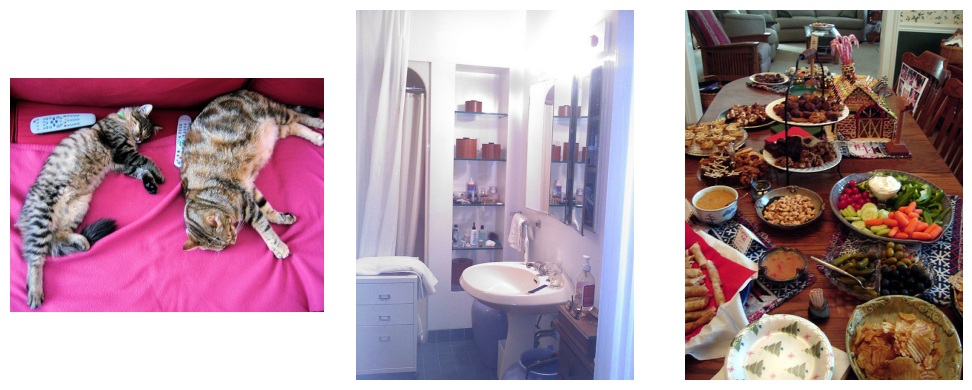

<image>User: a photo of GPT:<answer> two cats sleeping.<|endofchunk|><image>User: a photo of GPT:<answer> a bathroom sink.<|endofchunk|><image>User: a photo of GPT:<answer>
GPT:  A table full of food.


In [4]:
demo_image_one = Image.open(requests.get("http://images.cocodataset.org/val2017/000000039769.jpg", stream=True).raw)
demo_image_two = Image.open(requests.get("http://images.cocodataset.org/test-stuff2017/000000028137.jpg", stream=True).raw)
query_image = Image.open(requests.get("http://images.cocodataset.org/test-stuff2017/000000028352.jpg", stream=True).raw)
vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
model.text_tokenizer.padding_side = "left"
lang_x = model.text_tokenizer(
    [
        "<image>User: a photo of GPT:<answer> two cats sleeping.<|endofchunk|><image>User: a photo of GPT:<answer> a bathroom sink.<|endofchunk|><image>User: a photo of GPT:<answer>"
    ],
    return_tensors="pt",
)

# Get the data type from model's parameters
model_dtype = next(model.parameters()).dtype

# Convert tensors to the model's data type
vision_x = vision_x.to(dtype=model_dtype)
lang_x_input_ids = lang_x["input_ids"]
lang_x_attention_mask = lang_x["attention_mask"]

bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
generated_text = model.generate(
    vision_x=vision_x.to(model.device),
    lang_x=lang_x_input_ids.to(model.device),
    attention_mask=lang_x_attention_mask.to(model.device),
    max_new_tokens=512,
    num_beams=3,
    no_repeat_ngram_size=3,
    bad_words_ids=bad_words_id,
)

parsed_output = (
    model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
)

print(vision_x.shape) # torch.Size([1, 3, 1, 3, 224, 224]) shape (B, num_imgs, Frames=1, C, H, W)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(demo_image_one)
axes[0].axis('off')
axes[1].imshow(demo_image_two)
axes[1].axis('off')
axes[2].imshow(query_image)
axes[2].axis('off')
plt.tight_layout()
plt.show()
print(model.text_tokenizer.decode(lang_x_input_ids[0]))
print("GPT: ", parsed_output)

## 元論文に記載の画像で推論

In [ ]:
# captioning
query_image_path = "./images/captioning/pancake.png"
# query_image_path = "./images/captioning/drive.png"

# output (pancake)
# OTTER-Image-MPT7B:
# The image features a wooden dining table with various items on it, including a plate of breakfast food, a cup of coffee, a fork, a knife, and a spoon. There are also a few ornaments on the table, adding a festive touch to the scene.
# batch4_epoch6_lr-5(checkpoint_3):
# In the image, there is a wooden table with a piece of cake, a fork, a knife, and a cup. Around the table, there are Christmas decorations such as a tree and a garland. In the corner of the table is a bottle. There is also a chair nearby. The table has a white tablecloth, and there is another table in the background.

# output (drive)
# OTTER-Image-MPT7B:
# Drivers might experience confusion or delays in navigating the intersection due to the conflicting traffic signals.
# batch4_epoch6_lr-5(checkpoint_3):
# If drivers are not used to the new traffic signals, they could potentially cause an accident by not following the correct signals. This could lead to collisions between vehicles or pedestrians. Additionally, confusion over the new signals could cause delays or disruptions to the flow of traffic in the area. It is important for the city to ensure that the new signal changes are clearly communicated to drivers to minimize the risk of confusion and potential accidents.

query_image = Image.open(query_image_path)
vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
model.text_tokenizer.padding_side = "left"
lang_x = model.text_tokenizer(
    [
        "<image>User: Write a detailed description of the given image? GPT:<answer>"
    ],
    return_tensors="pt",
)
# lang_x = model.text_tokenizer(
#     [
#         "<image>User: What could happen if drivers become confused by the traffic signals at this intersection? GPT:<answer>"
#     ],
#     return_tensors="pt",
# )

# Get the data type from model's parameters
model_dtype = next(model.parameters()).dtype

# Convert tensors to the model's data type
vision_x = vision_x.to(dtype=model_dtype)
lang_x_input_ids = lang_x["input_ids"]
lang_x_attention_mask = lang_x["attention_mask"]

bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
generated_text = model.generate(
    vision_x=vision_x.to(model.device),
    lang_x=lang_x_input_ids.to(model.device),
    attention_mask=lang_x_attention_mask.to(model.device),
    max_new_tokens=512,
    num_beams=3,
    no_repeat_ngram_size=3,
    bad_words_ids=bad_words_id,
)

parsed_output = (
    model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
)

print(vision_x.shape)
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
axes.imshow(query_image)
axes.axis('off')
plt.tight_layout()
plt.show()
print(model.text_tokenizer.decode(lang_x_input_ids[0]))
print("GPT: ", parsed_output)

Setting `pad_token_id` to `eos_token_id`:50277 for open-end generation.


torch.Size([1, 3, 1, 3, 224, 224])


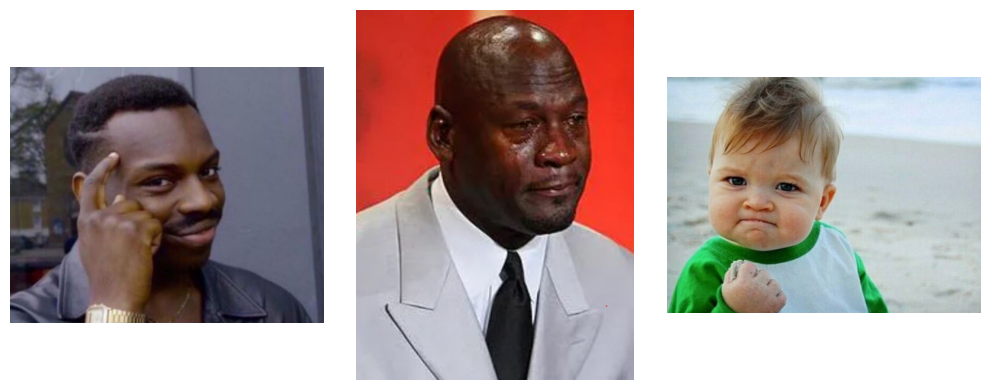

<image>User: what does this meme usually use for? GPT:<answer> to ask people to think twice and don't be silly.<|endofchunk|><image>User: what does this meme usually use for? GPT:<answer> to express users feeling of sad, or moving.<|endofchunk|><image>User: what does this meme usually use for? GPT:<answer>
GPT:  This meme is often used to express a sense of triumph or success. For example, someone might post the image to celebrate a recent achievement or milestone.


In [13]:
import textwrap

# ICL (meme)
demo_image_one_path = "./images/ICL/meme/man1.png"
demo_image_two_path = "./images/ICL/meme/man2.png"
query_image_path = "./images/ICL/meme/boy.png"

# output (meme)
# OTTER-Image-MPT7B:
# This meme is usually used to express happiness, joy, or excitement in various situations. In this case, the baby is excited about something, and the meme captures that emotion.
# batch4_epoch6_lr-5(checkpoint_3):
# This meme is often used to express a sense of triumph or success. For example, someone might post the image to celebrate a recent achievement or milestone.

# ICL (sport)
# demo_image_one_path = "./images/ICL/sport/tennis.png"
# demo_image_two_path = "./images/ICL/sport/baseball.png"
# query_image_path = "./images/ICL/sport/soccer.png"

# output (sport)
# OTTER-Image-MPT7B:
# In soccer, there is a risk of injuries due to collisions, falls, or contact with the ball. In the image, the soccer players are wearing protective gear, such as helmets and shin guards, to minimize the risk of severe injuries.
# batch4_epoch6_lr-5(checkpoint_3):
# The sport depicted in the image is soccer, which is known for its fast-paced gameplay and physical demands. One of the dangers of the sport is the risk of injuries resulting from collisions between players, especially during tackles or attempts to control the ball. Injuries can range from minor bruises to severe fractures or even long-term disabilities, depending on the severity of the impact. This highlights the importance of protective gear, such as helmets and pads, to minimize injury risk in soccer and other contact sports.

demo_image_one = Image.open(demo_image_one_path)
demo_image_two = Image.open(demo_image_two_path)
query_image = Image.open(query_image_path)
vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
model.text_tokenizer.padding_side = "left"
inputs = textwrap.dedent(f"""
            <image>User: what does this meme usually use for? GPT:<answer> to ask people to think twice and don't be silly.<|endofchunk|>
            <image>User: what does this meme usually use for? GPT:<answer> to express users feeling of sad, or moving.<|endofchunk|>
            <image>User: what does this meme usually use for? GPT:<answer>
""")
# inputs = textwrap.dedent(f"""
#             <image>User: What is the danger of this sport? GPT:<answer> The player may get hitted by the tennis ball.<|endofchunk|>
#             <image>User: What is the danger of this sport? GPT:<answer> While chasing the baseball, the player may inadvertently collide with other players.<|endofchunk|>
#             <image>User: What is the danger of this sport? GPT:<answer>
# """)
inputs = "".join(inputs.split("\n"))
lang_x = model.text_tokenizer(
    [
        inputs
    ],
    return_tensors="pt",
)

# Get the data type from model's parameters
model_dtype = next(model.parameters()).dtype

# Convert tensors to the model's data type
vision_x = vision_x.to(dtype=model_dtype)
lang_x_input_ids = lang_x["input_ids"]
lang_x_attention_mask = lang_x["attention_mask"]

bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
generated_text = model.generate(
    vision_x=vision_x.to(model.device),
    lang_x=lang_x_input_ids.to(model.device),
    attention_mask=lang_x_attention_mask.to(model.device),
    max_new_tokens=512,
    num_beams=3,
    no_repeat_ngram_size=3,
    bad_words_ids=bad_words_id,
)

parsed_output = (
    model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
)

print(vision_x.shape) # torch.Size([1, 3, 1, 3, 224, 224]) shape (B, num_imgs, Frames=1, C, H, W)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(demo_image_one)
axes[0].axis('off')
axes[1].imshow(demo_image_two)
axes[1].axis('off')
axes[2].imshow(query_image)
axes[2].axis('off')
plt.tight_layout()
plt.show()
print(model.text_tokenizer.decode(lang_x_input_ids[0]))
print("GPT: ", parsed_output)

In [9]:
model_name = "../../log/MIMIC_IT/batch4_epoch6_lr-5/checkpoint_3.pt"
trained_ckpt_path = f'{model_name}'

train_ckpt = torch.load(trained_ckpt_path, map_location="cpu")
if train_ckpt.get("model_state_dict", None) is not None:
    train_ckpt = train_ckpt["model_state_dict"]
_ = model.load_state_dict(train_ckpt, strict=False)

## MIMIC-ITのjsonファイルの確認

In [ ]:
# ○○_instructions.json
import orjson

mimicit_path="/home/data/MIMICIT/LA/LACR_I2I_instructions.json"
with open(mimicit_path, "rb") as f:
    dataset = orjson.loads(f.read())
    # dataset = orjson.loads(f.read())["data"]
dataset

In [ ]:
# ○○.json
import ijson

images = {}
images_path="/home/data/MIMICIT/LA/LA.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value
images

In [ ]:
# エンコードされた文字列から画像可視化
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# base64エンコードされた文字列データ
str_data1 = images["LA_IMG_000000215677"]
str_data2 = images["LA_IMG_000000429446"]

# バイトデータにデコード
decoded_data1 = base64.b64decode(str_data1)
decoded_data2 = base64.b64decode(str_data2)

# デコードしたバイトデータをImageオブジェクトに変換
image1 = Image.open(BytesIO(decoded_data1))
image2 = Image.open(BytesIO(decoded_data2))

# 2x1のsubplotを作成して、2枚の画像を表示
fig, axarr = plt.subplots(1, 2)

axarr[0].imshow(image1)
axarr[0].axis('off')  # 軸を非表示に

axarr[1].imshow(image2)
axarr[1].axis('off')  # 軸を非表示に

plt.show()


In [ ]:
# ○○_train.json
import orjson

train_config_path="/home/data/MIMICIT/LA/LACR_I2I_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())
cache_train_config

In [ ]:
cache_train_list = list(cache_train_config.keys())
print(len(cache_train_list))
print(cache_train_list[:10])

In [ ]:
cache_train_config['LACR_I2I_INS_000000296754']

In [ ]:
cache_train_config['LACR_I2I_INS_000000222475']

## 自作データセット確認

In [ ]:
import orjson

mimicit_path="/home/data/MIMIC-IT/VI/train_VI_long_instructions.json"
with open(mimicit_path, "rb") as f:
    dataset = orjson.loads(f.read())
dataset

In [ ]:
import ijson

images = {}
images_path="/home/data/MIMIC-IT/VI/train_VI.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value
# images

In [ ]:
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# base64エンコードされた文字列データ
str_data1 = images["metal+metal+image_55"]
str_data2 = images["metal+metal_rust+image_8"]

# デコードしたバイトデータをImageオブジェクトに変換
image1 = Image.open(BytesIO(base64.urlsafe_b64decode(str_data1))).convert("RGB")
image2 = Image.open(BytesIO(base64.urlsafe_b64decode(str_data2))).convert("RGB")

# 2x1のsubplotを作成して、2枚の画像を表示
fig, axarr = plt.subplots(1, 2)

axarr[0].imshow(image1)
axarr[0].axis('off')  # 軸を非表示に

axarr[1].imshow(image2)
axarr[1].axis('off')  # 軸を非表示に

plt.show()

In [ ]:
import orjson

train_config_path="/home/data/MIMIC-IT/VI/train_VI_pairs25_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())
cache_train_config

In [ ]:
cache_train_list = list(cache_train_config.keys())
print(len(cache_train_list))
print(cache_train_list[:10])

In [ ]:
cache_train_config['book+aged_book+image_2=0']

## ICL性能調査

MVTecAD クエリ良品

In [3]:
import os

def get_image_paths(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']  # 画像の拡張子リスト
    all_files = sorted(os.listdir(folder_path)) # フォルダ内の全てのファイルを取得
    image_paths = [os.path.join(folder_path, file) for file in all_files if os.path.splitext(file)[1].lower() in image_extensions] # 画像のパスを抽出してリストに格納
    return image_paths

def write_text_file(file_path, text):
    with open(file_path, mode="a") as f:
        f.write(text+"\n")
        
def generate_list_string(items):
    # アンダースコアをスペースに変換
    items = [item.replace('_', ' ') for item in items]
    if len(items) == 1:
        return items[0]
    elif len(items) == 2:
        return f"{items[0]} and {items[1]}"
    else:
        return ", ".join(items[:-1]) + f", and {items[-1]}"

In [4]:
import os
import textwrap
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def test_ok(folder, sub_folder, GTs, gt_idx, model_name):
    if folder=="grid":
        folder__ = "metal grid"
    else:
        folder__ = folder
    folder__ = folder__.replace('_', ' ')
    
    # save log
    folder_name = f'./result/{folder}/{sub_folder}/{model_name}'
    os.makedirs(folder_name, exist_ok=True)
    log_name = "query_ok.txt"
    with open(f'{folder_name}/{log_name}', mode='w') as f:
        f.close()
    
    demo_image_one = Image.open(f"/home/dataset/mvtec/{folder__}/test/good/000.png").resize((224, 224)).convert("RGB")
    demo_image_two = Image.open(f"/home/dataset/mvtec/{folder__}/test/{sub_folder}/000.png").resize((224, 224)).convert("RGB")
    query_folder_path = f"/home/dataset/mvtec/{folder__}/test/good"
    query_image_paths = get_image_paths(query_folder_path)
    
    subfolder_string = generate_list_string(GTs)
    
    sentence = f"{sub_folder} --> {GTs[gt_idx]}"
    print(sentence)
    write_text_file(f'{folder_name}/{log_name}',sentence)
    write_text_file(f'{folder_name}/{log_name}',"")
    
    sentence = f"context1: OK, context2: NG, query: OK"
    print(sentence)
    write_text_file(f'{folder_name}/{log_name}',sentence)
    write_text_file(f'{folder_name}/{log_name}',"")

    write_text_file(f'{folder_name}/{log_name}',f'-----{sub_folder} start-----')
    write_text_file(f'{folder_name}/{log_name}',"")
    
    yesno_count = 0
    for i, query_image_path in enumerate(query_image_paths[1:]):
        print(i)
        query_image = Image.open(query_image_path).resize((224, 224)).convert("RGB")            
                
        vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
        model.text_tokenizer.padding_side = "left"

        inputs = textwrap.dedent(f"""
                        <image>User: This is an image of {folder__}. Does this {folder__} have any defects such as {subfolder_string}? GPT:<answer> No. This {folder__} does not have any defects such as {subfolder_string}, so it is non-defective.<|endofchunk|>
                        <image>User: This is an image of {folder__}. Does this {folder__} have any defects such as {subfolder_string}? GPT:<answer> Yes. This {folder__} has some {GTs[gt_idx]}, so it is defective.<|endofchunk|>
                        <image>User: This is an image of {folder__}. Does this {folder__} have any defects such as {subfolder_string}? GPT:<answer>
        """)
        inputs = "".join(inputs.split("\n"))
        lang_x = model.text_tokenizer(
            [
                inputs
            ],
            return_tensors="pt",
        )
        
        # write instruction 
        if i ==0:
            write_text_file(f'{folder_name}/{log_name}',inputs)
            write_text_file(f'{folder_name}/{log_name}',"")

        # print(vision_x.shape) # torch.Size([1, 3, 1, 3, 224, 224]) shape (B, num_imgs, Frames=1, C, H, W)

        _, axes = plt.subplots(1, 3, figsize=(10, 4))
        axes[0].imshow(demo_image_one)
        axes[0].axis('off')
        axes[1].imshow(demo_image_two)
        axes[1].axis('off')
        axes[2].imshow(query_image)
        axes[2].axis('off')
        plt.tight_layout()
        plt.show()

        # Get the data type from model's parameters
        model_dtype = next(model.parameters()).dtype

        # Convert tensors to the model's data type
        vision_x = vision_x.to(dtype=model_dtype)
        lang_x_input_ids = lang_x["input_ids"]
        lang_x_attention_mask = lang_x["attention_mask"]

        bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
        generated_text = model.generate(
            vision_x=vision_x.to(model.device),
            lang_x=lang_x_input_ids.to(model.device),
            attention_mask=lang_x_attention_mask.to(model.device),
            max_new_tokens=512,
            num_beams=3,
            no_repeat_ngram_size=3,
            bad_words_ids=bad_words_id,
        )

        parsed_output = (
            model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
        )
        
        print(inputs)
        print("GPT: ", parsed_output)
        
        if parsed_output.split(".")[0].lower()=="no":
                yesno_count += 1
                
        write_text_file(f'{folder_name}/{log_name}',query_image_path)
        write_text_file(f'{folder_name}/{log_name}',parsed_output)
        write_text_file(f'{folder_name}/{log_name}',"")
    
    yesno_acc = f"correct: {yesno_count}, total: {len(query_image_paths)-1}, yesno acc: {(yesno_count / (len(query_image_paths)-1)) * 100:.2f}%"
    
    write_text_file(f'{folder_name}/{log_name}',f'-----{sub_folder} end-----')
    write_text_file(f'{folder_name}/{log_name}',yesno_acc)
    print(yesno_acc)
    
def test_ng(folder, sub_folder, GTs, gt_idx, model_name):
    if folder=="grid":
        folder__ = "metal grid"
    else:
        folder__ = folder
    folder__ = folder__.replace('_', ' ')
    
    # save log
    folder_name = f'./result/{folder}/{sub_folder}/{model_name}'
    os.makedirs(folder_name, exist_ok=True)
    log_name = "query_ng.txt"
    with open(f'{folder_name}/{log_name}', mode='w') as f:
        f.close()
    
    demo_image_one = Image.open(f"/home/dataset/mvtec/{folder__}/test/good/000.png").resize((224, 224)).convert("RGB")
    demo_image_two = Image.open(f"/home/dataset/mvtec/{folder__}/test/{sub_folder}/000.png").resize((224, 224)).convert("RGB")
    query_folder_path = f"/home/dataset/mvtec/{folder__}/test/{sub_folder}"
    query_image_paths = get_image_paths(query_folder_path)
    
    subfolder_string = generate_list_string(GTs)
    
    sentence = f"{sub_folder} --> {GTs[gt_idx]}"
    print(sentence)
    write_text_file(f'{folder_name}/{log_name}',sentence)
    write_text_file(f'{folder_name}/{log_name}',"")
    
    sentence = f"context1: OK, context2: NG, query: NG"
    print(sentence)
    write_text_file(f'{folder_name}/{log_name}',sentence)
    write_text_file(f'{folder_name}/{log_name}',"")

    write_text_file(f'{folder_name}/{log_name}',f'-----{sub_folder} start-----')
    write_text_file(f'{folder_name}/{log_name}',"")
    
    yesno_count = 0
    for i, query_image_path in enumerate(query_image_paths[1:]):
        print(i)
        query_image = Image.open(query_image_path).resize((224, 224)).convert("RGB")            
                
        vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
        model.text_tokenizer.padding_side = "left"

        inputs = textwrap.dedent(f"""
                        <image>User: This is an image of {folder__}. Does this {folder__} have any defects such as {subfolder_string}? GPT:<answer> No. This {folder__} does not have any defects such as {subfolder_string}, so it is non-defective.<|endofchunk|>
                        <image>User: This is an image of {folder__}. Does this {folder__} have any defects such as {subfolder_string}? GPT:<answer> Yes. This {folder__} has some {GTs[gt_idx]}, so it is defective.<|endofchunk|>
                        <image>User: This is an image of {folder__}. Does this {folder__} have any defects such as {subfolder_string}? GPT:<answer>
        """)
        inputs = "".join(inputs.split("\n"))
        lang_x = model.text_tokenizer(
            [
                inputs
            ],
            return_tensors="pt",
        )
        
        # write instruction 
        if i ==0:
            write_text_file(f'{folder_name}/{log_name}',inputs)
            write_text_file(f'{folder_name}/{log_name}',"")

        # print(vision_x.shape) # torch.Size([1, 3, 1, 3, 224, 224]) shape (B, num_imgs, Frames=1, C, H, W)

        _, axes = plt.subplots(1, 3, figsize=(10, 4))
        axes[0].imshow(demo_image_one)
        axes[0].axis('off')
        axes[1].imshow(demo_image_two)
        axes[1].axis('off')
        axes[2].imshow(query_image)
        axes[2].axis('off')
        plt.tight_layout()
        plt.show()

        # Get the data type from model's parameters
        model_dtype = next(model.parameters()).dtype

        # Convert tensors to the model's data type
        vision_x = vision_x.to(dtype=model_dtype)
        lang_x_input_ids = lang_x["input_ids"]
        lang_x_attention_mask = lang_x["attention_mask"]

        bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
        generated_text = model.generate(
            vision_x=vision_x.to(model.device),
            lang_x=lang_x_input_ids.to(model.device),
            attention_mask=lang_x_attention_mask.to(model.device),
            max_new_tokens=512,
            num_beams=3,
            no_repeat_ngram_size=3,
            bad_words_ids=bad_words_id,
        )

        parsed_output = (
            model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
        )
        
        print(inputs)
        print("GPT: ", parsed_output)
        
        if parsed_output.split(".")[0].lower()=="yes":
                yesno_count += 1
                
        write_text_file(f'{folder_name}/{log_name}',query_image_path)
        write_text_file(f'{folder_name}/{log_name}',parsed_output)
        write_text_file(f'{folder_name}/{log_name}',"")
    
    yesno_acc = f"correct: {yesno_count}, total: {len(query_image_paths)-1}, yesno acc: {(yesno_count / (len(query_image_paths)-1)) * 100:.2f}%"
    
    write_text_file(f'{folder_name}/{log_name}',f'-----{sub_folder} end-----')
    write_text_file(f'{folder_name}/{log_name}',yesno_acc)
    print(yesno_acc)

モデル重み読み込み

In [10]:
save_name = "test/batch128_epoch1_lr-5_true"
model_name = "/home/data/MIMIC-IT/weights/test/batch128_epoch1_lr-5_true"
trained_ckpt_path = f'{model_name}/final_weights.pt'

train_ckpt = torch.load(trained_ckpt_path, map_location="cpu")
if train_ckpt.get("model_state_dict", None) is not None:
    train_ckpt = train_ckpt["model_state_dict"]
_ = model.load_state_dict(train_ckpt, strict=False)

In [ ]:
folder = "wood"
ngs = ["color","scratch","liquid","hole"]
GTs = ["stained wood","scratched wood","wood with holes"]
test_ok(folder, ngs[0], GTs, 0, save_name)
test_ng(folder, ngs[0], GTs, 0, save_name)

In [ ]:
folder = "hazelnut"
ngs = ["crack","cut","hole","print"]
GTs = ['cracked hazelnut','scratched hazelnut','hazelnut with holes','misprinted hazelnut']
test_ok(folder, ngs[0], GTs, 0, save_name)
test_ng(folder, ngs[0], GTs, 0, save_name)